In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE

import tensorflow as tf

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('/content/Bank-Term-Deposit-Dataset.xlsx')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [4]:
data.shape

(32950, 16)

In [5]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [6]:
data['duration'] = data['duration'].apply(lambda n:n/60).round(2)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,3.78,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,3.37,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,19.13,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,2.00,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,6.13,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,3.20,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,1.07,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,2.18,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,2.75,1,999,0,nonexistent,no


<Axes: xlabel='duration'>

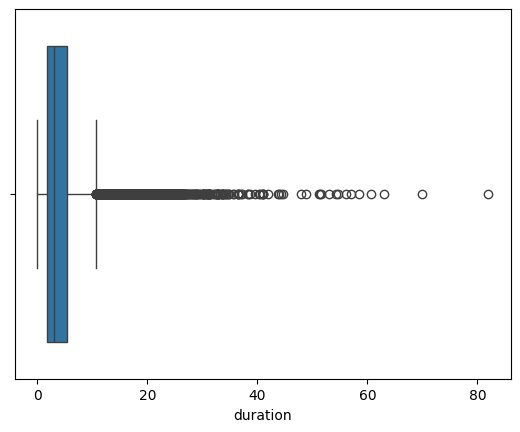

In [7]:
sns.boxplot(data=data,x='duration')

In [8]:
q3 = data['duration'].quantile(.75)
q1 = data['duration'].quantile(.25)
iqr = q3-q1
iqr

np.float64(3.6000000000000005)

<Axes: xlabel='duration'>

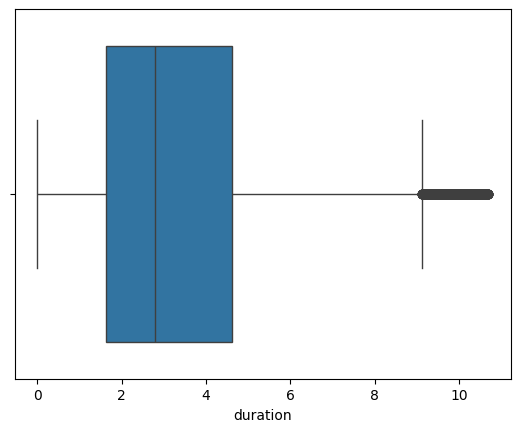

In [9]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
df = data[(data['duration']>bottomrange) & (data['duration']<upperrange)]
sns.boxplot(data=df,x='duration')

In [10]:
data.shape

(32950, 16)

In [11]:
category_cols = list(data.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

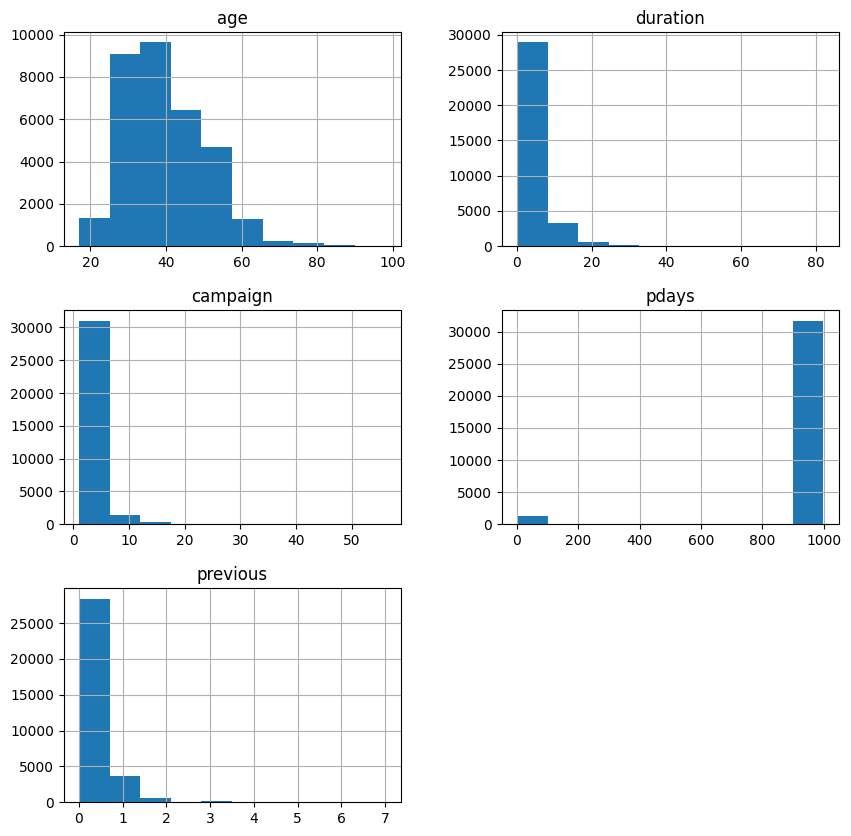

In [12]:
data.hist(figsize=(10,10))
plt.show()

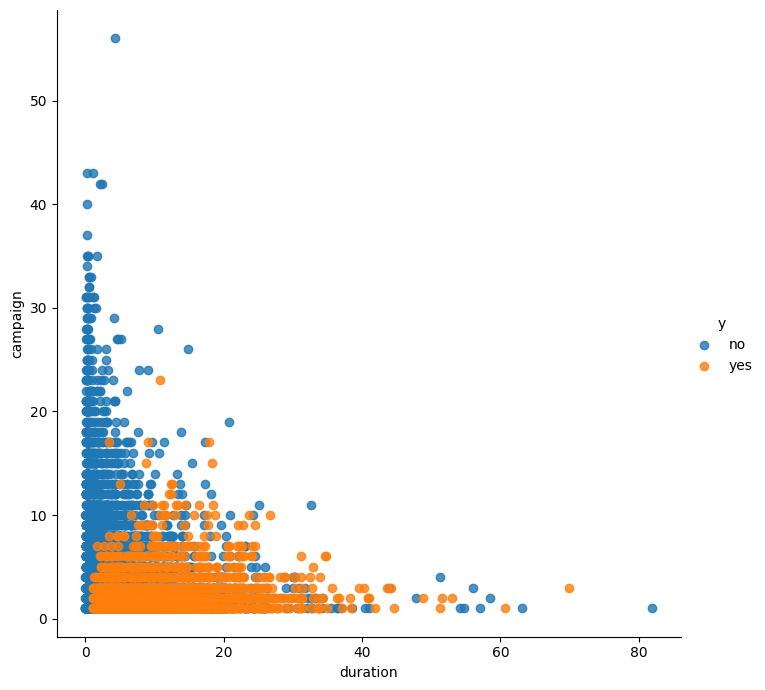

In [13]:
sns.lmplot(x='duration', y='campaign',data = data,hue = 'y',fit_reg = False,scatter_kws={'alpha':0.8,}, height =7)

Text(0, 0.5, 'Y')

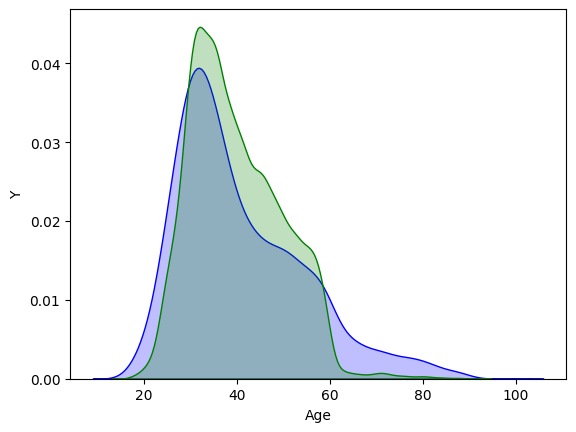

In [14]:
fig, ax = plt.subplots()

sns.kdeplot(data[data["y"]=='yes']["age"], shade=True, color="blue", label="Choose", ax=ax)
sns.kdeplot(data[data["y"]=='no']["age"], shade=True, color="green", label="Did not choose", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Y")

(array([1.346e+03, 9.061e+03, 9.629e+03, 6.454e+03, 4.682e+03, 1.288e+03,
        2.650e+02, 1.540e+02, 6.900e+01, 2.000e+00]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <BarContainer object of 10 artists>)

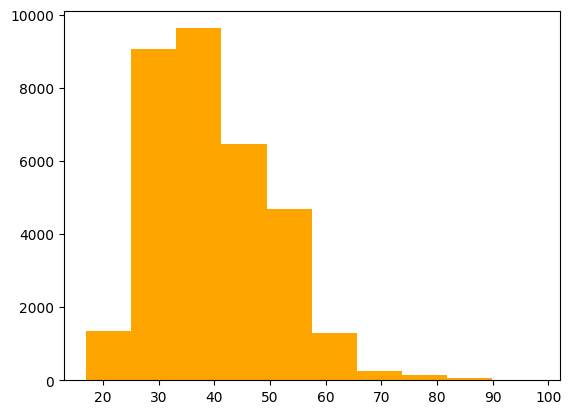

In [15]:
plt.hist(data['age'], color="orange")

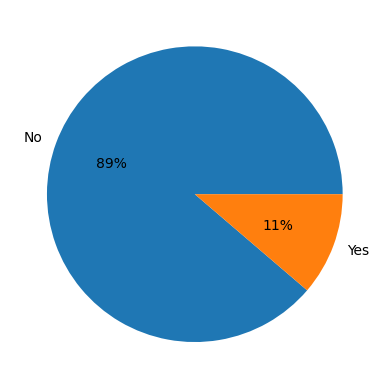

In [16]:
labels = ['No', 'Yes']
y_data = data.groupby('y')['y'].count()
plt.pie(y_data,labels=labels, autopct='%.0f%%')
plt.show()

In [17]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
new_data = pd.get_dummies(data[['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome']], drop_first=True)
new_data

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
32946,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
32947,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
32948,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [19]:
y_data = data['y']
age_data = data['age']
duration_data = data['duration']
campaign_data = data['campaign']
clean_data = pd.concat([y_data,age_data,duration_data,campaign_data, new_data], axis=1)

In [20]:
clean_data['y']  = clean_data['y'].replace('yes',1)
clean_data['y']  = clean_data['y'].replace('no',0)

In [21]:
clean_data

,y,age,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,49,3.78,4,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,0,37,3.37,2,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,1,78,19.13,1,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
3,0,36,2.00,2,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
4,0,59,6.13,2,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,0,28,3.20,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
32946,0,52,1.07,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
32947,0,54,2.18,4,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
32948,0,29,2.75,1,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [22]:
df1 = clean_data[['marital_single', 'marital_married', 'marital_unknown', 'y']].copy()
df2 = clean_data[['job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_management','job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','job_unknown','y']].copy()
df3 = clean_data[['education_basic.6y', 'education_basic.9y', 'education_high.school','education_illiterate','education_professional.course','education_university.degree','education_unknown', 'y']].copy()
df4 = clean_data[['month_aug', 'month_dec','month_jul','month_jun','month_mar','month_may','month_nov','month_oct','month_sep','y']].copy()
df5 = clean_data[['day_of_week_mon', 'day_of_week_thu','day_of_week_tue','day_of_week_wed','y']].copy()
df6 = clean_data[['duration','age', 'y']].copy()

In [23]:
clean_data.columns

Index(['y', 'age', 'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

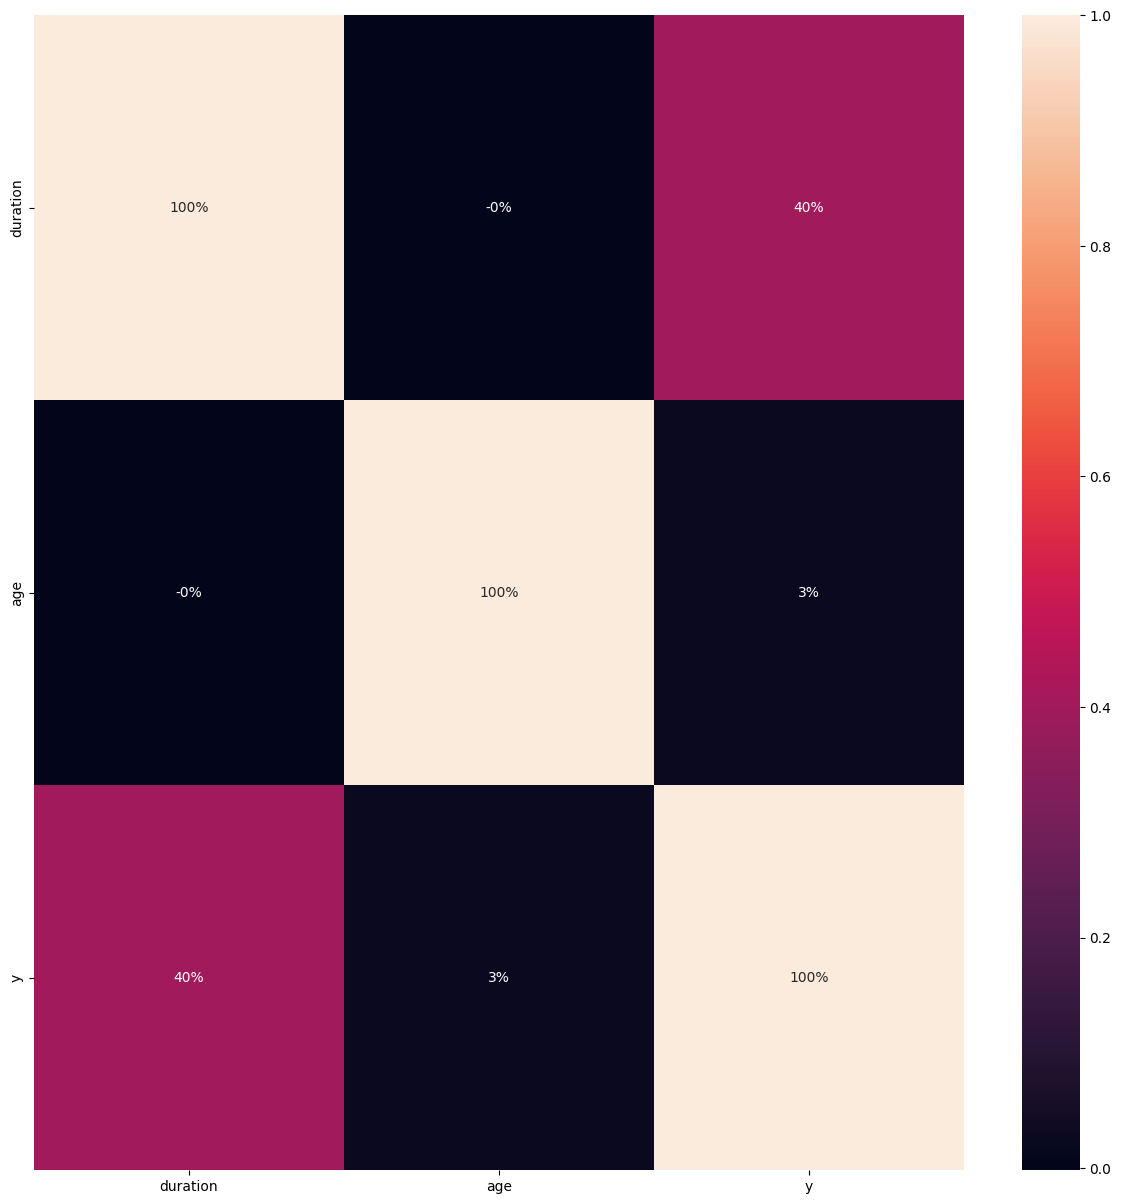

In [24]:
plt.subplots(figsize=(15,15))
sns.heatmap(df6.corr(), annot = True, fmt = '0.0%')
plt.show

In [25]:
y = clean_data['y']
x = clean_data.drop('y',axis=1)

In [26]:
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [27]:
columns = x_train.columns

In [28]:
os_data_X,os_data_y=os.fit_resample(x_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [29]:
clean_data_vars=clean_data.columns.values.tolist()
y=['y']
X=[i for i in clean_data if i not in y]

In [30]:
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False  True False False False False
 False False False False  True  True  True  True  True  True  True  True
 False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True]
[24 20 22  6 10  5 12  1 21  8  4 11  7  9  3  2  1  1  1  1  1  1  1  1
 19 23 18 16 15 17 13  1  1  1  1  1  1  1  1  1  1  1  1  1 14  1]


In [31]:
x.columns

Index(['age', 'duration', 'campaign', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [32]:
cols=['duration','job_blue-collar','job_entrepreneur', 'job_housemaid', 'job_self-employed','job_unemployed','education_basic.6y',
      'education_basic.9y', 'education_high.school','education_professional.course','education_university.degree', 'education_unknown',
      'contact_telephone', 'month_aug','month_jul','month_jun','month_may','month_nov', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
      'day_of_week_tue','day_of_week_wed','poutcome_nonexistent','poutcome_success']

X=os_data_X[cols]
y=os_data_y['y']

In [37]:
X = X.astype(int)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.436207
         Iterations 7
                                Results: Logit
Model:                   Logit                Method:               MLE       
Dependent Variable:      y                    Pseudo R-squared:     0.371     
Date:                    2025-12-11 16:38     AIC:                  38319.2869
No. Observations:        43866                BIC:                  38536.5092
Df Model:                24                   Log-Likelihood:       -19135.   
Df Residuals:            43841                LL-Null:              -30406.   
Converged:               1.0000               LLR p-value:          0.0000    
No. Iterations:          7.0000               Scale:                1.0000    
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [40]:
print((logreg.score(X_test, y_test)*100))

87.14324792559496


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5545
           1       0.90      0.84      0.87      5422

    accuracy                           0.87     10967
   macro avg       0.87      0.87      0.87     10967
weighted avg       0.87      0.87      0.87     10967



In [42]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[5026,  519],
       [ 891, 4531]])

In [43]:
y = clean_data['y']
x = clean_data.drop('y',axis=1)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .80)

In [45]:
lreg = LogisticRegression()

In [46]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [47]:
pred2 = lreg.predict(x_test)
pred2

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
accuracy_score(y_test,pred2)*100

90.57663125948406

In [49]:
zero_count = np.count_nonzero(pred2 == 0)
zero_count

6178

In [50]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5835
           1       0.66      0.36      0.47       755

    accuracy                           0.91      6590
   macro avg       0.79      0.67      0.71      6590
weighted avg       0.89      0.91      0.89      6590



In [51]:
cnf_matrix = metrics.confusion_matrix(y_test,pred2)
cnf_matrix

array([[5696,  139],
       [ 482,  273]])

In [52]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(x_train, y_train)

SVC()

In [53]:
y_predsv = svm.predict(x_test)
y_predsv

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
accuracy_score(y_test,y_predsv)*100

88.7556904400607

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)

In [57]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
y_predknn = knn.predict(x_test)
y_predknn

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
accuracy_score(y_test,y_predknn)*100

89.39301972685888

In [60]:
from xgboost import XGBClassifier

In [61]:
clf = XGBClassifier(n_estimators=1000,random_state=100)
clf.fit(x_train, y_train)
predicted=clf.predict(x_test)

In [62]:
y_predxgb = clf.predict(x_test)
y_predxgb



array([0, 0, 0, ..., 0, 0, 0])

In [63]:
accuracy_score(y_test,y_predxgb)*100

89.77238239757209

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gbc=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5,
                           n_estimators=1000, random_state=100)

In [66]:
y_predgbc = gbc.predict(x_test)
y_predgbc

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
accuracy_score(y_test,y_predgbc)*100

90.7587253414264

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
abr=AdaBoostClassifier(n_estimators=1000,learning_rate=0.05,random_state=100)
abr.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=1000, random_state=100)

In [70]:
y_predabc = abr.predict(x_test)
y_predabc

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
accuracy_score(y_test,y_predabc)*100

89.69650986342944

In [72]:
from sklearn.ensemble import BaggingClassifier

In [73]:
clf = BaggingClassifier(n_estimators = 1000, random_state = 22)

In [74]:
clf.fit(x_train, y_train)

BaggingClassifier(n_estimators=1000, random_state=22)

In [75]:
y_predbag = clf.predict(x_test)
y_predbag

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
accuracy_score(y_test,y_predbag)*100

90.50075872534143

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
regressor = RandomForestClassifier(n_estimators = 10, random_state = 100)

In [79]:
regressor.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=100)

In [80]:
predicted = regressor.predict(x_test)

In [81]:
accuracy_score(y_test,predicted)*100

89.75720789074356

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
classifier_model = DecisionTreeClassifier(min_samples_leaf=5)
classifier_model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=5)

In [84]:
predicted = classifier_model.predict(x_test)

In [85]:
accuracy_score(y_test,predicted)*100

88.7556904400607

In [86]:
#cols=['duration','job_blue-collar','job_entrepreneur', 'job_housemaid', 'job_self-employed','job_unemployed','education_basic.6y',
#     'education_basic.9y', 'education_high.school','education_professional.course','education_university.degree', 'education_unknown',
#      'contact_telephone', 'month_aug','month_jul','month_jun','month_may','month_nov', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
#      'day_of_week_tue','day_of_week_wed','poutcome_nonexistent','poutcome_success']

x=clean_data.drop('y',axis=1)
y=clean_data['y']
x.head

<bound method NDFrame.head of        age  duration  campaign  job_blue-collar  job_entrepreneur  \
0       49      3.78         4             True             False   
1       37      3.37         2            False              True   
2       78     19.13         1            False             False   
3       36      2.00         2            False             False   
4       59      6.13         2            False             False   
...    ...       ...       ...              ...               ...   
32945   28      3.20         1            False             False   
32946   52      1.07         1            False             False   
32947   54      2.18         4            False             False   
32948   29      2.75         1            False             False   
32949   35      9.07         3            False             False   

       job_housemaid  job_management  job_retired  job_self-employed  \
0              False           False        False              False   
1              False           False        False              False   
2              False           False         True              False   
3              False           False        False              False   
4              False           False         True              False   
...              ...             ...          ...                ...   
32945          False           False        False              False   
32946          False           False        False              False   
32947          False           False        False              False   
32948          False           False        False              False   
32949          False           False        False              False   

       job_services  ...  month_may  month_nov  month_oct  month_sep  \
0             False  ...      False       True      False      False   
1             False  ...      False       True      False      False   
2             False  ...      False      False      False      False   
3             False  ...       True      False      False      False   
4             False  ...      False      False      False      False   
...             ...  ...        ...        ...        ...        ...   
32945          True  ...      False      False      False      False   
32946         False  ...      False       True      False      False   
32947         False  ...      False      False      False      False   
32948         False  ...       True      False      False      False   
32949         False  ...      False      False      False      False   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0                False            False            False             True   
1                False            False            False             True   
2                 True            False            False            False   
3                 True            False            False            False   
4                False            False             True            False   
...                ...              ...              ...              ...   
32945            False            False             True            False   
32946            False            False            False            False   
32947             True            False            False            False   
32948            False            False            False            False   
32949            False            False             True            False   

       poutcome_nonexistent  poutcome_success  
0                      True             False  
1                     False             False  
2                      True             False  
3                      True             False  
4                      True             False  
...                     ...               ...  
32945                  True             False  
32946                 False             False  
32947                  True             False  
32948 

In [87]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=0)
y_test

,y
5379,0
13301,0
15089,0
8998,0
18820,0
...,...
22982,0
29248,0
28842,0
12856,0


In [90]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(24, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(16, activation='relu'),
                            tf.keras.layers.Dense(12, activation='relu'),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(4, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),

              ]
              )

# STEP 3: Fitting the model

history= model.fit(x_train, y_train, epochs= 100)

Epoch 1/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8820 - loss: 0.4484 - precision: 0.1250
Epoch 2/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8887 - loss: 0.3495 - precision: 0.0000e+00
Epoch 3/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8887 - loss: 0.3495 - precision: 0.0000e+00
Epoch 4/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8887 - loss: 0.3495 - precision: 0.0000e+00
Epoch 5/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8887 - loss: 0.3495 - precision: 0.0000e+00
Epoch 6/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8887 - loss: 0.3495 - precision: 0.0000e+00
Epoch 7/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8887 - loss: 0.3495 - precision: 0.0000e+00
Epoch 8/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8887 - loss: 0.3495 - precision: 0.0000e+00
Epoch 9/100
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8887 - loss: 0.3495 - precision: 0.0000e+00
Epoch

In [91]:
model.evaluate(x_test,y_test)

206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8909 - loss: 0.3449 - precision: 0.0000e+00


[0.3560018241405487, 0.8854324817657471, 0.0]

<Axes: >

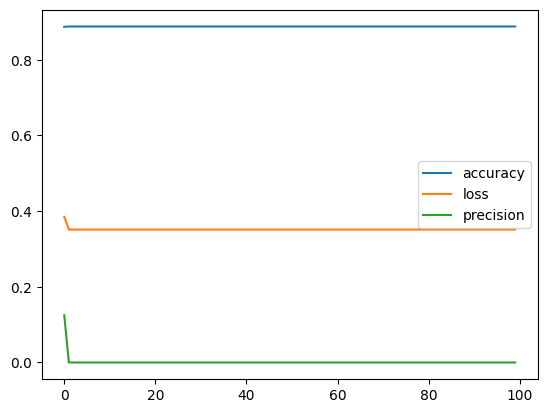

In [92]:
pd.DataFrame(history.history).plot()

In [99]:
File → Download → Download .ipynb


SyntaxError: invalid character '→' (U+2192) (ipython-input-890714386.py, line 1)